# (Ford Go Bike 2/2019)
## by (Mohamed Mahmoud Hamdi)

## Preliminary Wrangling

><font color= 'blue'> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

><font color= 'blue'> And the target from that wrangling effort is to detect the week and strong points in service performance to help development team to take the right decisions to increase company performance and profit.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [2]:
# Loading the data CSV file from the project directory

csv_file_path_name = '201902-fordgobike-tripdata.csv'

try:
    df = pd.read_csv(csv_file_path_name)
    df_copy= df.copy()
except BaseException as e:
    print(e)
    print("failed to load file {}".format(csv_file_path_name))

In [3]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<font color= 'blue'>We have 15 columns in our data frame, each record is for a one bike ride information, like location and time of start and end, ride duration, and some personal information about the rider (year of birth and gender), and another information about the service he got.

In [5]:
df_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<font color= 'blue'>We found that we have missing values in the following columns:

<font color= 'blue'>1- "start_station_id"

<font color= 'blue'>2- "start_station_name"
    
<font color= 'blue'>3- "end_station_id"
    
<font color= 'blue'>4- "end_station_name"

<font color= 'blue'>although they have a latitude and longitude
    
<font color= 'blue'>also we have missing values in:

<font color= 'blue'>5- "member_birth_year"
    
<font color= 'blue'>6- "member_gender"

In [6]:
df_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## <font color= 'red'>What is the active stations we have? Draw a map chart for all stations and adding activity to them?

In [7]:
#Check that all stations in start column are exist in the end column and vise versa, so that using one of them to create 
# a new DataFrame to fasilitate drawing the map chart

if df_copy.start_station_id.value_counts().shape[0] == df_copy.end_station_id.value_counts().shape[0]:
    pd.Series(df_copy.start_station_id.value_counts().index.sort_values() ==\
              df_copy.end_station_id.value_counts().index.sort_values()).value_counts()
else:
    print("False")

In [8]:
#As the below columns have missing values they need to be Corrected:
# 1- "start_station_id"        2- "start_station_name"
# 3- "end_station_id"        4- "end_station_name"

#by checking if the missed id share the same latitude and longitude with another station id,
#or we need to give it a new id

#get indeces of missing start_station_id
indeces = df_copy[df_copy.start_station_id.isna()].index

#get Maximum Id to add above it to give an id for the missing Ids
max_id = df_copy.start_station_id.max()

for index in indeces: # itterate over the missing indeces to know first it the missing Id have the same location of another known ID
    #or we need to add a new Id for it
    
    #get all the stations that share the same location of our missed Id station
    a = df_copy[(df_copy['start_station_latitude'] == df_copy.start_station_latitude[index]) & \
                (df_copy['start_station_longitude'] == df_copy.start_station_longitude[index])].index
    
    #if all 'a' has no Id, then create a new Id
    if df_copy['start_station_id'].iloc[a].isna().sum() == len(a):
        df_copy.at[index , 'start_station_id'] = max_id + 1
        df_copy.at[index, 'start_station_name'] = 'unknown station name, id= ' + str(max_id + 1)
        max_id += 1
    #if not, so there is a station in the same location has an id, so give out station the existing Id
    else:
        df_copy.at[index , 'start_station_id'] = df_copy['start_station_id'].iloc[a].max()
        df_copy.at[index, 'start_station_name'] = df_copy['start_station_name'].iloc[a].sort_values(ascending=False).values[0]
        
#after solving all station Id problems in start_station_id, we need to solve those in the end one

# get the missing indeces from the end Id column
indeces = df_copy[df_copy.end_station_id.isna()].index
max_id = max(df_copy.start_station_id.max(), df_copy.end_station_id.max())

for index in indeces: #itterate over our missing end station Id list
    
    #get all stations share the same location for start and end Id columns
    a = df_copy[(df_copy['start_station_latitude'] == df_copy.end_station_latitude[index]) & \
                (df_copy['start_station_longitude'] == df_copy.end_station_longitude[index])].index
    
    b = df_copy[(df_copy['end_station_latitude'] == df_copy.end_station_latitude[index]) & \
                (df_copy['end_station_longitude'] == df_copy.end_station_longitude[index])].index

    if len(a) > 0: #As now we don't have missing Ids in start column, so if we got data in 'a', we will give our station that existing Id
        df_copy.at[index , 'end_station_id'] = df_copy['start_station_id'].iloc[a].max()
        df_copy.at[index, 'end_station_name'] = df_copy['start_station_name'].iloc[a].sort_values(ascending=False).values[0]
    
    #Check if all 'b' records have an empty Id or not, and if not, give it the existing Id
    elif df_copy['end_station_id'].iloc[b].isna().sum() != len(b):
        df_copy.at[index , 'end_station_id'] = df_copy['end_station_id'].iloc[b].max()
        df_copy.at[index, 'end_station_name'] = df_copy['end_station_name'].iloc[b].sort_values(ascending=False).values[0]
    
    #otherwise create a new Id
    else:
        df_copy.at[index , 'end_station_id'] = max_id + 1
        df_copy.at[index, 'end_station_name'] = 'unknown station name, id= ' + str(max_id + 1)
        max_id += 1
        
        
print(df_copy.isna().sum())
print("\n\n")
print(df_copy.start_station_id.value_counts())
print("\n\n")
print(df_copy.end_station_id.value_counts())

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64



58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
300.0       4
344.0       2
412.0       1
411.0       1
409.0       1
Name: start_station_id, Length: 343, dtype: int64



67.0     4857
58.0     3973
21.0     3647
15.0     3368
3.0      2997
         ... 
411.0       1
415.0       1
409.0       1
414.0       1
413.0       1
Name: end_station_id, Length: 346, dtype: int64


In [9]:
#Check that all stations in start column are exist in the end column and vise versa after correction of ids columns

if df_copy.start_station_id.value_counts().shape[0] == df_copy.end_station_id.value_counts().shape[0]:
    pd.Series(df_copy.start_station_id.value_counts().index.sort_values() ==\
              df_copy.end_station_id.value_counts().index.sort_values()).value_counts()
else:
    print("False")

False


In [10]:
#create station locations map

#create a DataFrame for Start Stations locations
df_start_stations_locations = df_copy[['start_station_id',
                                 'start_station_latitude',
                                 'start_station_longitude']].groupby(by= 'start_station_id').max()

#create a DataFrame for End Stations locations
df_end_stations_locations = df_copy[['end_station_id',
                                 'end_station_latitude',
                                 'end_station_longitude']].groupby(by= 'end_station_id').max()


#adjust columns name to allow merging the two dataFrames
df_start_stations_locations = df_start_stations_locations.rename(columns={'start_station_latitude': 'station_latitude',
                                                                          'start_station_longitude': 'station_longitude'})

df_start_stations_locations.rename_axis(['station_id'], inplace=True)

df_end_stations_locations = df_end_stations_locations.rename(columns={'end_station_latitude': 'station_latitude',
                                                                      'end_station_longitude': 'station_longitude'})

df_end_stations_locations.rename_axis(['station_id'], inplace=True)



#Create a new DataFrame that contains all the stations in the start and end stations dataFrames
df_stations_locations = df_start_stations_locations.merge(df_end_stations_locations, how= 'outer',
                                                          on= 'station_id', suffixes=(None, '_1'))

df_stations_locations = pd.DataFrame(df_stations_locations,columns=['station_latitude', 'station_latitude_1',
                                                                    'station_longitude', 'station_longitude_1'])

df_stations_locations.fillna(method = 'bfill', axis = 1, inplace = True)

df_stations_locations.drop(labels= ['station_latitude_1', 'station_longitude_1'], axis=1, inplace = True)

df_stations_locations

,station_latitude,station_longitude
station_id,,
3.0,37.786375,-122.404904
4.0,37.785881,-122.408915
5.0,37.783899,-122.408445
6.0,37.804770,-122.403234
7.0,37.804562,-122.271738
...,...,...
411.0,37.380000,-121.940000
412.0,37.410000,-121.980000
413.0,37.380000,-121.930000


In [11]:
#Imporatant variables for the stations map chart.
areas_titles = ['Zone #1 Stations', 'Zone #2 Stations', 'Zone #3 Stations', 'All Zones Stations', 'Zone #4 Stations']
areas_xlim = [(37.31, 37.36), (37.37, 37.44), (37.77, 37.89), (None, None), (37.72, 37.81)]
areas_ylim = [(-121.92, -121.87), (-121.99, -121.91), (-122.31, -122.23), (None, None), (-122.46, -122.38)]
areas_title_y = [1, 1, 1, -0.2, -0.2]
position= [1,2,(3,4), (5,6),(7,8)]
show_ylable = [True, False, False, True, False]
show_xlable = [False, False, False, True, True]

<font color= 'blue'>The above map plot shows each zone stations clearly without interference, and it should be better to color each station with respect to its high or low activity

In [12]:
#creating two new coulumns that specify which zone of the start and end stations,
#and count how active each zone is and is their and activities between different zones 

#create a function to assign the data of the new columns
def zone_indentification(rec, select):
    xlim= [areas_xlim[0], areas_xlim[1], areas_xlim[2], areas_xlim[4]]
    ylim= [areas_ylim[0], areas_ylim[1], areas_ylim[2], areas_ylim[4]]
    for i in range(4):
        if (xlim[i][1] >= rec[select + 'station_latitude'] >= xlim[i][0]) and \
        (ylim[i][1] >= rec[select + 'station_longitude'] >= ylim[i][0]):
            break
        else:
            'error'
            
    return 'Zone #' + str(i+1)

df_copy['start_station_zone'] = df_copy.aggregate(zone_indentification, axis = 1, select ='start_')

df_copy['end_station_zone'] = df_copy.aggregate(zone_indentification, axis = 1, select ='end_')

df_copy[['start_station_zone', 'end_station_zone']]

,start_station_zone,end_station_zone
0,Zone #4,Zone #4
1,Zone #4,Zone #4
2,Zone #4,Zone #4
3,Zone #4,Zone #4
4,Zone #3,Zone #3
...,...,...
183407,Zone #4,Zone #4
183408,Zone #4,Zone #4
183409,Zone #1,Zone #1
183410,Zone #3,Zone #3


In [13]:
#Check for activities of zones to be trusted of our zone selections
df_zones_activities = (df_copy['start_station_zone'] + ' to ' + df_copy['end_station_zone']).value_counts()
df_zones_activities

Zone #4 to Zone #4    133839
Zone #3 to Zone #3     41098
Zone #1 to Zone #1      8073
Zone #2 to Zone #2       197
Zone #3 to Zone #4       109
Zone #4 to Zone #3        95
Zone #4 to Zone #1         1
dtype: int64

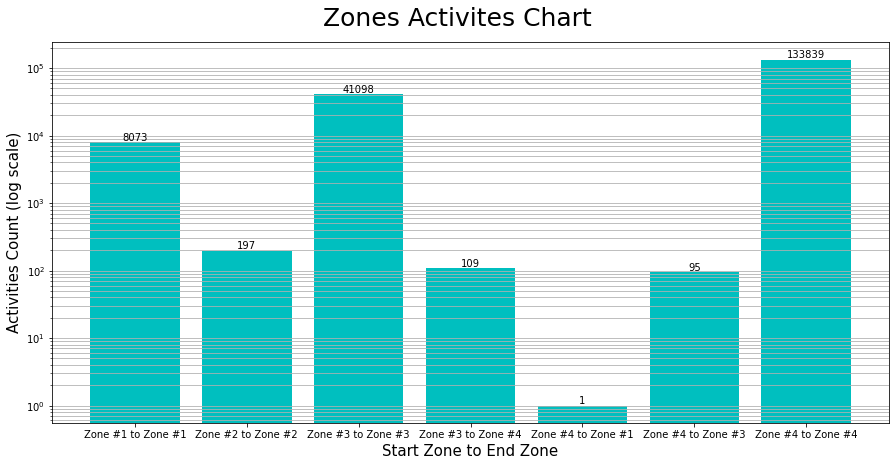

In [14]:
#plot zones activites chart
plt.figure(figsize=(15,7)).suptitle('Zones Activites Chart', size= 25, y= .95)

plt.grid(b=True, which='both', axis='y')
plt.bar(x= df_zones_activities.sort_index().index, height= df_zones_activities.sort_index().values,color= 'c', log = True);
plt.xlabel('Start Zone to End Zone', size = 15)
plt.ylabel('Activities Count (log scale)', size = 15)


for cat in df_zones_activities.sort_index().index:
    text = str(df_zones_activities.sort_index()[cat])
    y = df_zones_activities.sort_index()[cat] * 1.05
    plt.text(cat, y, text, ha= 'center')

<font color= 'blue'>It seems that the highest activities is for Zone #4, then for Zone #3, then Zone #1, and Zone #2 has a very low activity, also as traveling between zone have very low activity, so our zone separation is meaningful

In [15]:
#Creating two new columns in "df_stations_locations" DataFrame that show each station activity, to plot activity map

#create a temp DataFrames to have all the value counts of start and end stations, and adjust columns names
df_temp_count_start = pd.DataFrame(df_copy['start_station_id'].value_counts().sort_index())

df_temp_count_start = df_temp_count_start.rename(columns={'start_station_id': 'start_station_count'})



df_temp_count_end = pd.DataFrame(df_copy['end_station_id'].value_counts().sort_index())

df_temp_count_end = df_temp_count_end.rename(columns={'end_station_id': 'end_station_count'})


#Create a new DataFrame that contains all the stations in the start and end stations temp count dataFrames
df_temp_count = pd.concat([df_temp_count_start, df_temp_count_end], axis=1)

#fill NaN values with 0 to not affecting summation
df_temp_count.fillna(0, inplace=True)

#create a summation columns of start and end stations activity
df_temp_count['start_and_end_station_count'] = df_temp_count['start_station_count'] + df_temp_count['end_station_count']

df_temp_count = df_temp_count.sort_index()

#joining data of the temp dataframe to our main one 'df_stations_locations'
df_stations_locations = df_stations_locations.join(df_temp_count)

#adding 'station_zone' column
df_stations_locations['station_zone'] = df_stations_locations.aggregate(zone_indentification, axis = 1, select ='')

df_stations_locations

,station_latitude,station_longitude,start_station_count,end_station_count,start_and_end_station_count,station_zone
station_id,,,,,,
3.0,37.786375,-122.404904,2760.0,2997,5757.0,Zone #4
4.0,37.785881,-122.408915,610.0,609,1219.0,Zone #4
5.0,37.783899,-122.408445,2327.0,2353,4680.0,Zone #4
6.0,37.804770,-122.403234,2082.0,2512,4594.0,Zone #4
7.0,37.804562,-122.271738,827.0,778,1605.0,Zone #3
...,...,...,...,...,...,...
411.0,37.380000,-121.940000,1.0,1,2.0,Zone #2
412.0,37.410000,-121.980000,1.0,2,3.0,Zone #2
413.0,37.380000,-121.930000,0.0,1,1.0,Zone #2


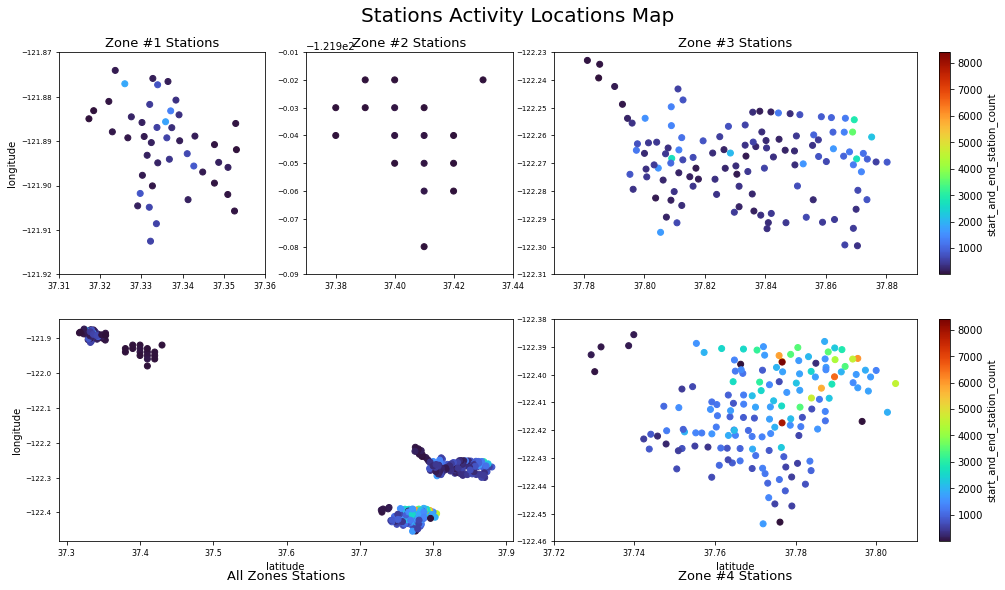

In [16]:
#plot an activity map for all stations

plt.figure(figsize=(17,9)).suptitle('Stations Activity Locations Map', size= 20, y= .95)

show_colorbar = [False, False, True, False, True]

for i in range(5):
    plt.subplot(2,4,position[i])
    plt.scatter(data= df_stations_locations,
                x= 'station_latitude',
                y= 'station_longitude',
                c= 'start_and_end_station_count',
                cmap= 'turbo');
    if show_xlable[i]:
        plt.xlabel('latitude')
    if show_ylable[i]:
        plt.ylabel('longitude')
    plt.xticks(size= 8)
    plt.yticks(size= 7)
    plt.title(areas_titles[i], y= areas_title_y[i], size= 13)
    plt.ylim(areas_ylim[i])
    plt.xlim(areas_xlim[i])
    if show_colorbar[i]:
        plt.colorbar(label = 'start_and_end_station_count');

<font color= 'blue'>That Map shows the high active stations not only the active Zone

In [17]:
#Create a DataFrame that contains data for the most common tracks (opted to be more than or equal to 50)

#create a column in df_copy to accomodate tracks started from lower station id number to higher station id number
df_copy['start_to_end_stations'] = df_copy.apply(lambda x: min(x.start_station_id,x.end_station_id)*1000+ max(x.start_station_id,x.end_station_id), axis=1)

#create a DataFrame for most common tracks and get tracks counts
df_most_common_trip = pd.DataFrame()
df_most_common_trip['start_to_end_stations'] = df_copy['start_to_end_stations'].value_counts().index
df_most_common_trip['start_to_end_stations_count'] = df_copy['start_to_end_stations'].value_counts().values

#remove all rows that have counts less than 50
df_most_common_trip[df_most_common_trip['start_to_end_stations_count']< 50] = np.nan
df_most_common_trip.dropna(inplace=True)

#extract start and end station ids from the track column
df_most_common_trip['start_station_id'] = (df_most_common_trip['start_to_end_stations']/1000).astype('int64')
df_most_common_trip['end_station_id'] = df_most_common_trip['start_to_end_stations']-df_most_common_trip['start_station_id']*1000


#getting the zone of the start station and add to a new column
df_most_common_trip['start_station_zone'] = df_most_common_trip.apply(lambda x: df_stations_locations['station_zone'][x.start_station_id], axis=1)

df_most_common_trip

,start_to_end_stations,start_to_end_stations_count,start_station_id,end_station_id,start_station_zone
0,182196.0,594.0,182,196.0,Zone #3
1,15081.0,509.0,15,81.0,Zone #4
2,280296.0,491.0,280,296.0,Zone #1
3,6015.0,486.0,6,15.0,Zone #4
4,6016.0,483.0,6,16.0,Zone #4
...,...,...,...,...,...
659,104345.0,50.0,104,345.0,Zone #4
660,312341.0,50.0,312,341.0,Zone #1
661,3078.0,50.0,3,78.0,Zone #4
662,7213.0,50.0,7,213.0,Zone #3


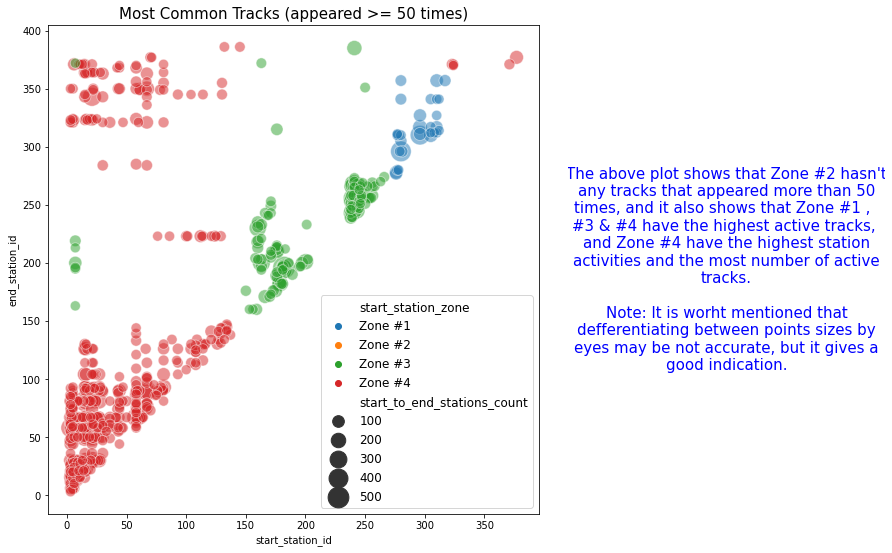

In [18]:
#draw a chart shows the most common tracks

zones_order = ['Zone #1', 'Zone #2', 'Zone #3', 'Zone #4']

plt.figure(figsize=(15,9))
plt.subplot(1,5,(1,3))
sb.scatterplot(data= df_most_common_trip, x= 'start_station_id', y= 'end_station_id',
               size= 'start_to_end_stations_count',
               sizes= (100, 500),
               hue= 'start_station_zone',
               hue_order= zones_order,
               alpha= 0.5);
plt.legend(fontsize = 'large');
plt.title('Most Common Tracks (appeared >= 50 times)', y= 1, size= 15)
ax= plt.subplot(1,5,(4,5))
plt.text(.5,.5,'''The above plot shows that Zone #2 hasn't any tracks that appeared more than 50 times, and it also shows that Zone #1 ,   #3 & #4 have the highest active tracks, 
and Zone #4 have the highest station activities and the most number of active tracks.
    
Note: It is worht mentioned that defferentiating between points sizes by eyes may be not accurate, but it gives a good indication.''',
         va= 'center', ha= 'center', fontsize= 15, wrap= True, color= 'blue', clip_on= True)
ax.axis('off');

<font color= 'blue'>The above plot shows that Zone #2 hasn't any tracks that appeared more than 50 times, and it also shows that Zone #1 , #3 & #4 have the highest active tracks, and Zone #4 have the highest station activities and the most number of active tracks.
    
<font color= 'green'> Note: It is worht mentioned that defferentiating between points sizes by eyes may be not accurate, but it gives a good indication.

## <font color= 'red'>What is the bikes activities, and which bikes are the most prefered? Draw a chart for bikes activities with relation to Zones:

In [19]:
#Create a DataFrame to study bikes loads

#Creating the DataFrame with the first columns that has value counts
df_bikes = pd.DataFrame(df_copy.bike_id.value_counts().sort_index())

df_bikes = df_bikes.rename(columns={'bike_id': 'count'})

#Creating the second column 'bike_id' and reorder it to be the first column and reset the index
df_bikes['bike_id'] = df_bikes.index

df_bikes = df_bikes.reset_index()

df_bikes = pd.DataFrame(df_bikes, columns=['bike_id', 'count'])

#Creating the thrid column that has the summation of 'duration_sec' for each bike
df_bikes['duration_sec'] = df_copy[['bike_id', 'duration_sec']].groupby(by= 'bike_id').sum().sort_index().values

#Creating the forth column to include the Zone of the bike
df_bikes['station_zone'] = df_copy[['bike_id', 'start_station_zone']].groupby(by= 'bike_id').\
agg(lambda x:x.value_counts().index[0]).sort_index().values


df_bikes

,bike_id,count,duration_sec,station_zone
0,11,39,26233,Zone #4
1,12,24,14901,Zone #3
2,13,10,6719,Zone #3
3,14,19,10084,Zone #3
4,15,9,6234,Zone #3
...,...,...,...,...
4641,6635,94,61005,Zone #4
4642,6636,77,58944,Zone #4
4643,6638,119,131128,Zone #4
4644,6644,88,60105,Zone #4


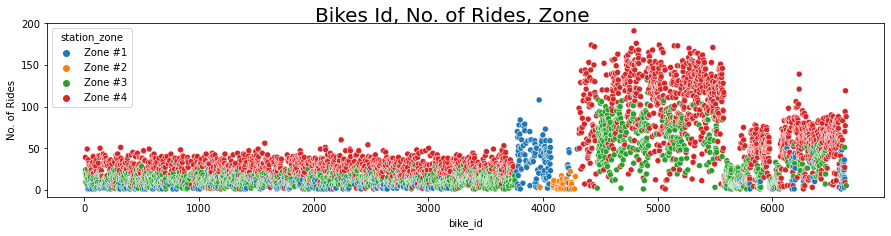

In [20]:
#Plotting 'Bikes Id, Count, Zone'
plt.figure(figsize=(15,3.2)).suptitle('Bikes Id, No. of Rides, Zone', size= 20, y= .95)

sb.scatterplot(data= df_bikes, x= 'bike_id', y= 'count', hue= 'station_zone', 
               hue_order= zones_order);
plt.ylabel('No. of Rides');

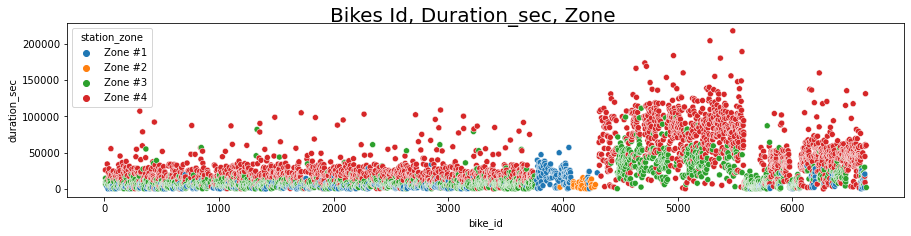

In [21]:
#Plotting 'Bikes Id, Duration_sec, Zone'
plt.figure(figsize=(15,3.2)).suptitle('Bikes Id, Duration_sec, Zone', size= 20, y= .95)

sb.scatterplot(data= df_bikes, x= 'bike_id', y= 'duration_sec', hue= 'station_zone', 
               hue_order= zones_order);

<font color= 'blue'>The above two charts, shows that bikes Ids from 4500 to 5500 has the most preferred specs, that reflected in their count of using and duration, company may buy more from those types to increase performance.

## <font color= 'red'>What is the ages and genders for our riders? and What is the best time of riding bikes?

In [22]:
#Now The data set has np.nan values at the following columns:
# 1- "member_birth_year"        2- "member_gender"
#It is better to remove records of them from our data set

df_copy.member_birth_year.fillna(1870, inplace=True) #1870 to get about 150 years in member age to show missing values
df_copy.member_gender.fillna('Missing Data', inplace=True)
"'No. of NaN values = "+ str(df_copy.isna().sum().sum()) + " Values'" + \
" & 'Data frame new length = " + str(df_copy.shape[0]) + " Rows'"

"'No. of NaN values = 0 Values' & 'Data frame new length = 183412 Rows'"

In [23]:
#Adjusting data types of "start_time", "end_time", "start_station_id", & "end_station_id"

df_copy = df_copy.astype({'start_time' : 'datetime64[ns]',
                          'end_time' : 'datetime64[ns]',
                          'start_station_id' : 'int64',
                          'end_station_id' : 'int64',
                          'member_birth_year' : 'int64'})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  int64         
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  int64         
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [24]:
df_copy.member_gender.value_counts()

Male            130651
Female           40844
Missing Data      8265
Other             3652
Name: member_gender, dtype: int64

In [25]:
#As gender should be Male or Female only, all records with "other" should be an error and need to be changed to 'Missing Data'
gender_other_indices = df_copy[df_copy.member_gender == "Other"].index
df_copy.member_gender.iloc[gender_other_indices] = 'Missing Data'
df_copy.member_gender.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Male            130651
Female           40844
Missing Data     11917
Name: member_gender, dtype: int64

In [26]:
df_copy.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [27]:
#Adding "start_time" components to check active hours and days
df_copy.insert(2, 'start_time_day_name', df_copy.start_time.dt.dayofweek)
df_copy.insert(3, 'start_time_day', df_copy.start_time.dt.day)
df_copy.insert(4, 'start_time_hour', df_copy.start_time.dt.hour)


# Adding an age column that is more interpretable than year of birth
df_copy['member_age'] = 2019 - df_copy.member_birth_year

#Adding 'duration_sec_log' column as descripe method shows a very high maximum value "max 85444.000000" compared to "75% 796.000000"
df_copy.insert(2, 'duration_sec_log', np.log10(df_copy.duration_sec))

df_copy.head()

,duration_sec,start_time,duration_sec_log,start_time_day_name,start_time_day,start_time_hour,end_time,start_station_id,start_station_name,start_station_latitude,...,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_station_zone,end_station_zone,start_to_end_stations,member_age
0,52185,2019-02-28 17:32:10.145,4.717546,3,28,17,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,...,-122.402923,4902,Customer,1984,Male,No,Zone #4,Zone #4,13021.0,35
1,42521,2019-02-28 18:53:21.789,4.628603,3,28,18,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,...,-122.393170,2535,Customer,1870,Missing Data,No,Zone #4,Zone #4,23081.0,149
2,61854,2019-02-28 12:13:13.218,4.791368,3,28,12,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,...,-122.404904,5905,Customer,1972,Male,No,Zone #4,Zone #4,3086.0,47
3,36490,2019-02-28 17:54:26.010,4.562174,3,28,17,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,...,-122.444293,6638,Subscriber,1989,Missing Data,No,Zone #4,Zone #4,70375.0,30
4,1585,2019-02-28 23:54:18.549,3.200029,3,28,23,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,...,-122.248780,4898,Subscriber,1974,Male,Yes,Zone #3,Zone #3,7222.0,45


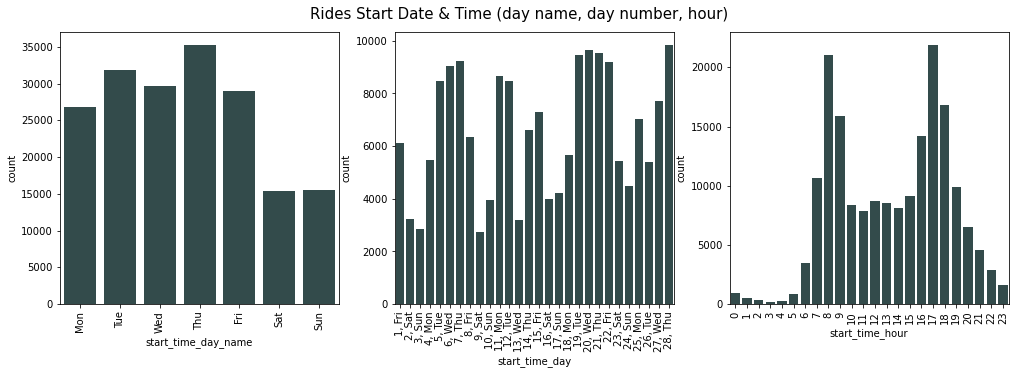

In [28]:
#plot data of 'start_time_day_name','start_time_day','start_time_hour'
num_columns_names = ['start_time_day_name',
                     'start_time_day',
                     'start_time_hour']

week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

#create a series that shows week day name beside date for 2/2019
month_days = pd.Series(np.arange(1,29)).apply(str) + ', ' +\
pd.Series((week_days+ week_days+ week_days+ week_days+ week_days)[4:32])

xticks = [range(7), range(28), range(24)]

xticks_lables = [week_days, month_days, None]

plt.figure(figsize=(17,5)).suptitle('Rides Start Date & Time (day name, day number, hour)', size= 15, y= .95)
counter = 0
for i in range(3):
    plt.subplot(1,3,counter+1)
    sb.countplot(data= df_copy, x= num_columns_names[i], color= 'darkslategrey');
    plt.xlabel(num_columns_names[i])
    counter+= 1
    plt.xticks(ticks= xticks[i], labels= xticks_lables[i], rotation = 'vertical')

<font color= 'blue'>The above charts shows that the activities are low in weekends (Sat., & Sun.), but day (13, wed.) has a low activity, although it is the day before what is called in America "Valentine's Day", so it may has a relation in getting low activities at that day.

<font color= 'blue'> Also the busiest hours in the day are from (7 to 9 O'clock) and from (16 to 18 O'clock).

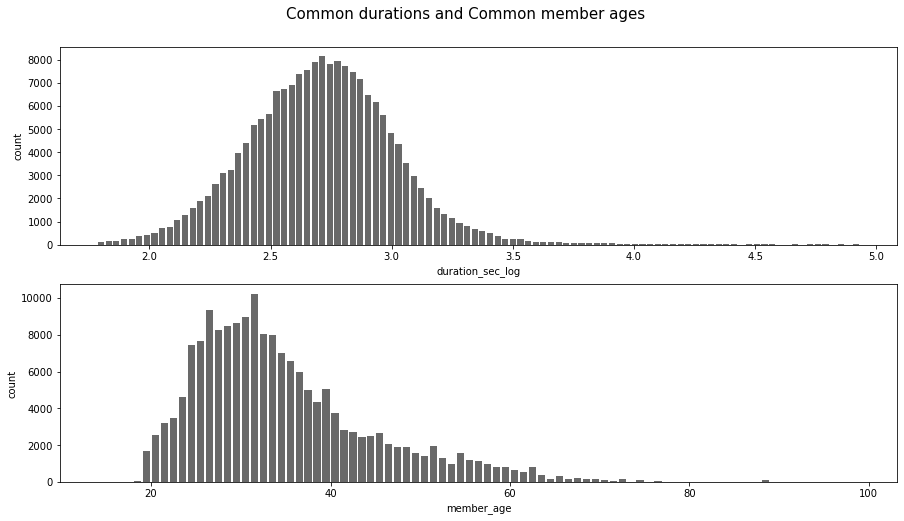

In [29]:
#plot data of 'duration_sec_log', 'member_age'
num_columns_names = {'duration_sec_log': [100,(None)],
                     'member_age': [85,(14, 99)]}
plt.figure(figsize=(15,8)).suptitle('Common durations and Common member ages', size= 15, y= .95)
counter = 0
for i in num_columns_names:
    plt.subplot(2,1,counter+1)
    plt.hist(data = df_copy, x= i, bins = num_columns_names[i][0], range = num_columns_names[i][1],
             color= 'dimgrey', rwidth= 0.8)
    plt.xlabel(i)
    plt.ylabel('count')
    counter+= 1

<font color= 'blue'>The above two charts shows that the most common durations from (10^2.5 to 10^3 seconds) (5.2 to 16.7 minutes), and the common ages are form (27 to 32 years)

## <font color= 'red'> What is the users selections (Bike Share and Subscribtion )? And what is the gender distributions?

In [30]:
#Get columns with 'object' datatype
df_copy.loc[:, df_copy.dtypes == "object"].columns

Index(['start_station_name', 'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'start_station_zone', 'end_station_zone'],
      dtype='object')

In [31]:
#Get columns with 'int64' datatype
df_copy.loc[:, df_copy.dtypes == "int64"].columns

Index(['duration_sec', 'start_time_day_name', 'start_time_day',
       'start_time_hour', 'start_station_id', 'end_station_id', 'bike_id',
       'member_birth_year', 'member_age'],
      dtype='object')

In [32]:
gender_classes= ['Male', 'Female', 'Missing Data']
genders = pd.api.types.CategoricalDtype(ordered= True, categories= gender_classes)
df_copy.member_gender = df_copy.member_gender.astype(genders)
df_copy.member_gender.dtype

CategoricalDtype(categories=['Male', 'Female', 'Missing Data'], ordered=True)

In [33]:
user_type_classes= ['Customer', 'Subscriber']
user_types = pd.api.types.CategoricalDtype(ordered= True, categories= user_type_classes)
df_copy.user_type = df_copy.user_type.astype(user_types)
df_copy.user_type.dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=True)

In [34]:
bike_share_for_all_trip_classes= ['Yes', 'No']
bike_share_for_all_trips = pd.api.types.CategoricalDtype(ordered= True, categories= bike_share_for_all_trip_classes)
df_copy.bike_share_for_all_trip = df_copy.bike_share_for_all_trip.astype(bike_share_for_all_trips)
df_copy.bike_share_for_all_trip.dtype

CategoricalDtype(categories=['Yes', 'No'], ordered=True)

In [35]:
zones_classes= ['Zone #1', 'Zone #2', 'Zone #3', 'Zone #4']
zones = pd.api.types.CategoricalDtype(ordered= True, categories= zones_classes)
df_copy.start_station_zone = df_copy.start_station_zone.astype(zones)
df_copy.end_station_zone = df_copy.end_station_zone.astype(zones)
df_copy.start_station_zone.dtype, df_copy.end_station_zone.dtype

(CategoricalDtype(categories=['Zone #1', 'Zone #2', 'Zone #3', 'Zone #4'], ordered=True),
 CategoricalDtype(categories=['Zone #1', 'Zone #2', 'Zone #3', 'Zone #4'], ordered=True))

In [36]:
#plot data of 'user_type', 'member_gender','bike_share_for_all_trip'
def type_gender_share(df_func, title, bars_color = 'darkslategrey', xlabel= True):
    
    
    #Calculate the maximum counts to be used as y-axis maximum value for the below data
    max_count = 0
    columns_names = ['user_type', 'member_gender','bike_share_for_all_trip']
    for name in columns_names:
        max_count = max(df_func[name].value_counts().values.max(), max_count)

    #get 20% margin above maximum value and round it
    n_digits_round = math.pow(10, (math.floor(math.log10(max_count)) -1))
    max_count = int(1.2 * max_count / n_digits_round)* n_digits_round

    #cat_orders
    cat_order = [user_type_classes, gender_classes, bike_share_for_all_trip_classes]
    
    #plot figure
    plt.figure(figsize=(16,2.5))#.suptitle(title, size= 15, y= .95)

    for i in range(len(columns_names)):
        plt.subplot(1,4,i+1)
        #cat_order = df_func[columns_names[i]].value_counts().index
        plot = sb.countplot(data= df_func, x= columns_names[i], color= bars_color, order= cat_order[i]);
        plot.set(ylim=(0, max_count))
        
        #add text above columns
        j=0
        for cat in cat_order[i]:
            text = str(round(df_func[columns_names[i]].value_counts()[cat]/df_func.shape[0]*100,2)) + " %"
            y = df_func[columns_names[i]].value_counts()[cat] + max_count * .02
            plt.text(j, y, text, ha= 'center')
            if xlabel==False:
                plot.set(xlabel="")
            j+=1

        if i != 0:
            plot.set(ylabel="")
            plot.set(yticklabels=[])
        
    ax= plt.subplot(1,4,4)
    plt.text(.5,.5,title,
             va= 'center', ha= 'center', fontsize= 15, wrap= True, color= 'black', clip_on= True)
    ax.axis('off');

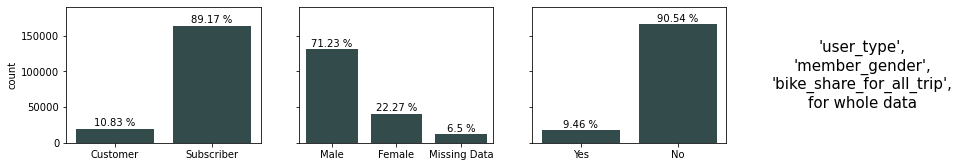

In [37]:
type_gender_share(df_copy,"""'user_type',
'member_gender',
'bike_share_for_all_trip',
for whole data""", xlabel=False)

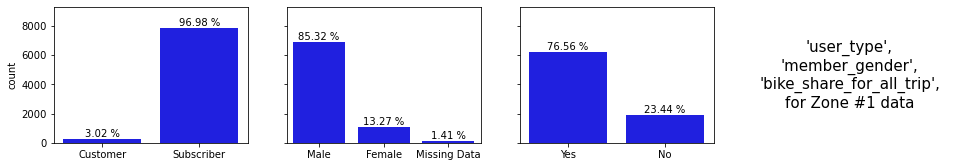

In [38]:
type_gender_share(df_copy.groupby(by= 'start_station_zone').get_group('Zone #1'),"""'user_type',
'member_gender',
'bike_share_for_all_trip',
for Zone #1 data""",
                  xlabel=False, bars_color = 'blue')

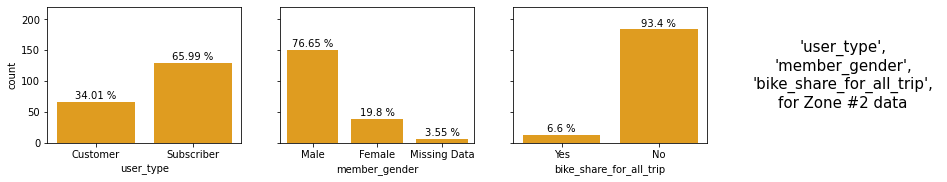

In [39]:
type_gender_share(df_copy.groupby(by= 'start_station_zone').get_group('Zone #2'),"""'user_type',
'member_gender',
'bike_share_for_all_trip',
for Zone #2 data""",
                  xlabel=True, bars_color = 'orange')

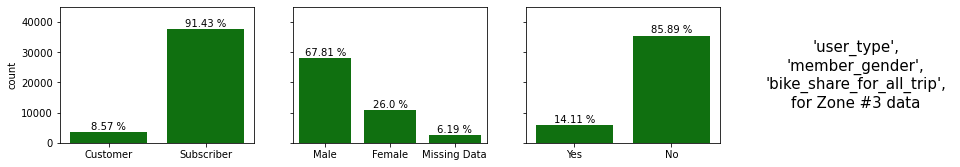

In [40]:
type_gender_share(df_copy.groupby(by= 'start_station_zone').get_group('Zone #3'),"""'user_type',
'member_gender',
'bike_share_for_all_trip',
for Zone #3 data""",
                  xlabel=False, bars_color = 'green')

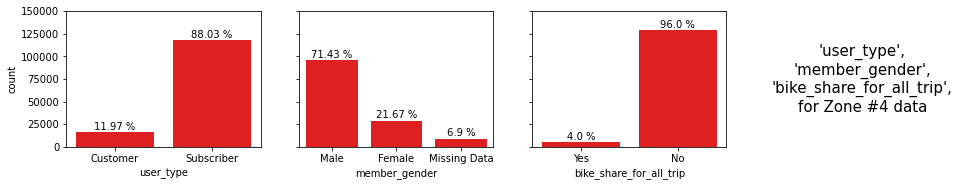

In [41]:
type_gender_share(df_copy.groupby(by= 'start_station_zone').get_group('Zone #4'),"""'user_type',
'member_gender',
'bike_share_for_all_trip',
for Zone #4 data""",
                  xlabel=True, bars_color = 'red')

<font color= 'blue'> The last five charts shows that:
* <font color= 'blue'> Customers are very high in Zone #2 compared with other Zones.
* <font color= 'blue'> Males are the most gender type on each Zone, and Zone #1 have the most percent of Males.    
* <font color= 'blue'> Zone #1 is the highest in the 'bike_share_for_all_trip' 'Yes' value, and also is higher than 'No' value.

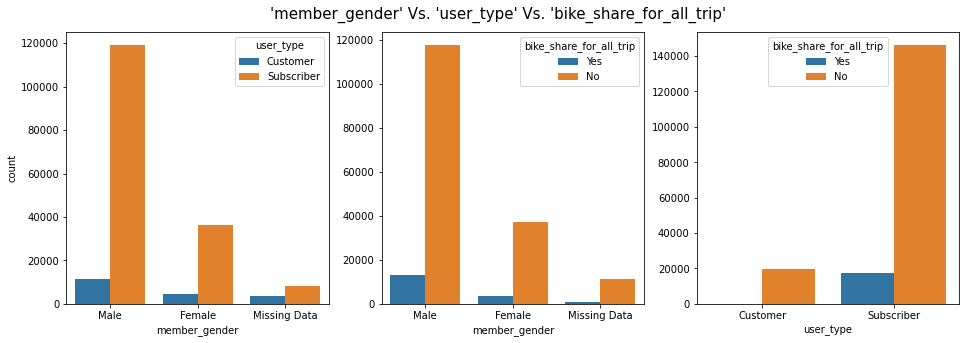

In [42]:
#plot 'member_gender', 'user_type', 'bike_share_for_all_trip' with relation to each others
names= ['member_gender', 'user_type', 'bike_share_for_all_trip']

plt.figure(figsize=(16,5)).suptitle("'member_gender' Vs. 'user_type' Vs. 'bike_share_for_all_trip'", size= 15, y= .95)

k=1
for i in range(3):
    for j in range(i+1,3):
        if j==i:
            continue
        plt.subplot(1,3, k)
        sb.countplot(data= df_copy, x= names[i], hue= names[j])
        if k>1:
            plt.ylabel(None)
        k+=1

<font color= 'blue'> The above charts shows that:
> <font color= 'blue'> all customers have No bike share for all trip

> <font color= 'blue'> Females have higher customers percentage than males

## <font color= 'red'> What is ages distributions and ride durations for each Zone?

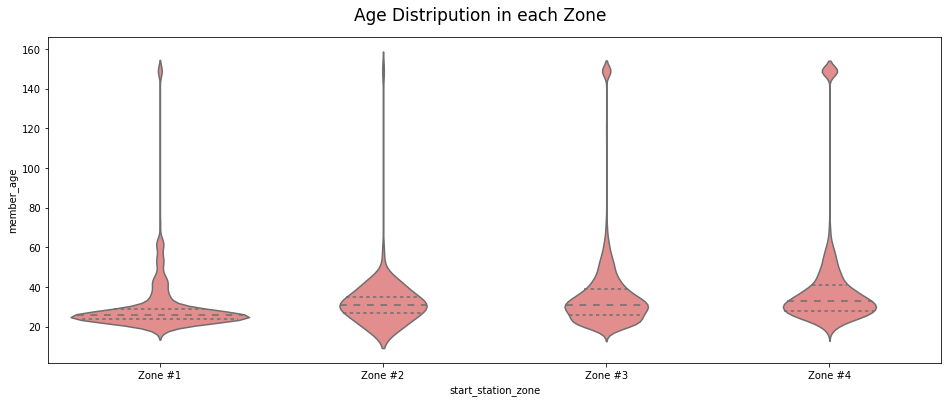

In [43]:
#Age distripution in each zone
plt.figure(figsize=(16,6)).suptitle("Age Distripution in each Zone", size= 17, y= .95)
sb.violinplot(data= df_copy, x= 'start_station_zone', y= 'member_age', color = 'lightcoral', inner = 'quartile');

<font color= 'blue'> The above chart shows that Zone #1 most common ages are below 35, and is the lowest, also Zone #4 has the highest percent of missing age data, that was opted to appear at 150 years.

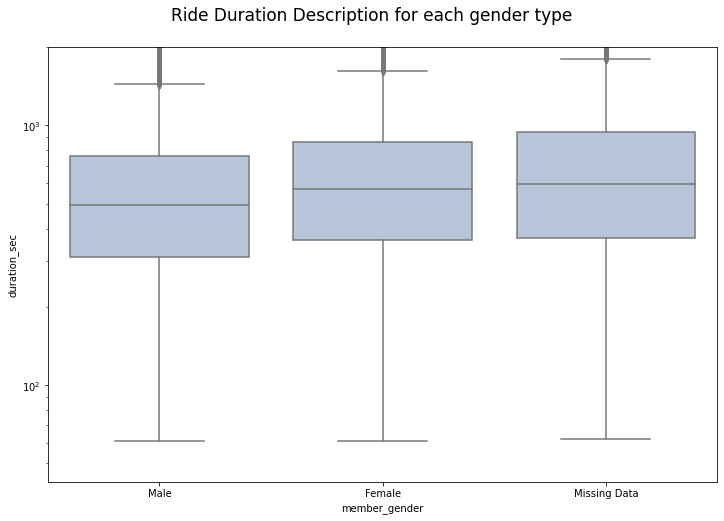

In [44]:
#Showing the relation of member gender and duration
plt.figure(figsize=(12,8)).suptitle("Ride Duration Description for each gender type", size= 17, y= .95)
sb.boxplot(data= df_copy, x= 'member_gender', y= 'duration_sec', color = 'lightsteelblue');
plt.yscale('log')
plt.ylim(top= 2000);

<font color= 'blue'>The above chart shows that females have higher riding time in average than males.

## <font color= 'red'> What is the relations between member ages and (Bike Share, Subscribtion and gender)?

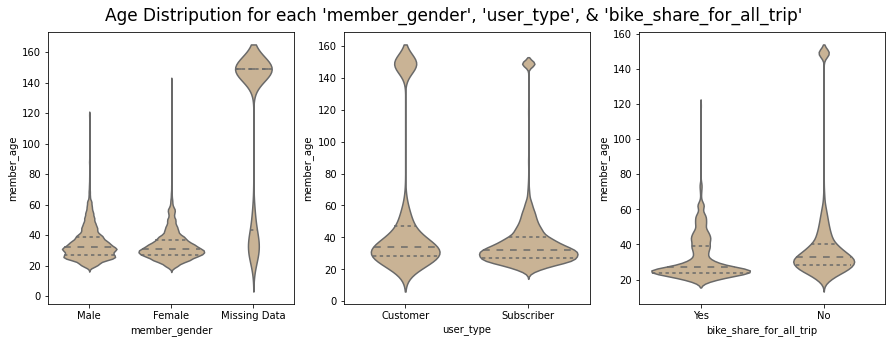

In [45]:
#Member ages and 'member_gender', 'user_type', 'bike_share_for_all_trip'
plt.figure(figsize=(15,5)).suptitle("Age Distripution for each 'member_gender', 'user_type', & 'bike_share_for_all_trip'", size= 17, y= .95)

i= 1

for name in names:
    plt.subplot(1,3,i)
    sb.violinplot(data= df_copy, x= name, y= 'member_age', color = 'tan', inner = 'quartile');
    i+=1

<font color= 'blue'>The above charts shows that:
> <font color= 'blue'> The most yes bike share are younger than the no ones.
    
> <font color= 'blue'> Females and Males shares almost the same age distribution, but males have slightly higher older distribution than females.
    
> <font color= 'blue'> Younger people tend to be customers than subscribers.

<font color= 'blue'>The below charts try to find the best plot to show the relation between Member age and Duration with Zone name or without

## <font color= 'red'> What is the relation between member age and riding durations?

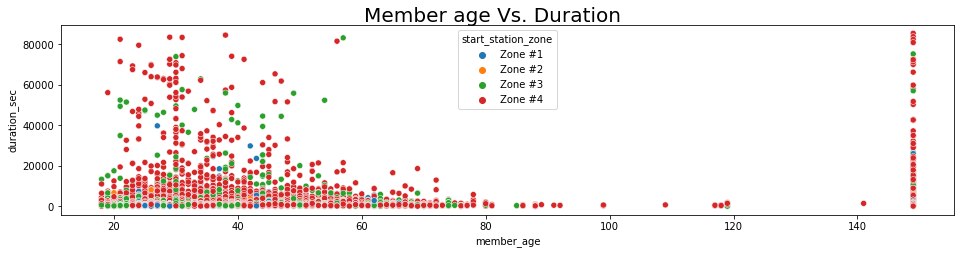

In [46]:
#Plotting 'Member age Vs. Duration'
plt.figure(figsize=(16,3.5)).suptitle('Member age Vs. Duration', size= 20, y= .95)

sb.scatterplot(data= df_copy, x= 'member_age', y= 'duration_sec', hue= 'start_station_zone', 
               hue_order= zones_order);

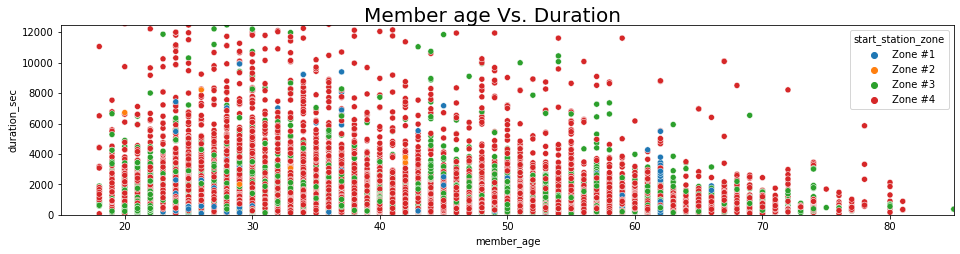

In [47]:
#Plotting 'Member age Vs. Duration' but foucusing on the high density zone in the chart
plt.figure(figsize=(16,3.5)).suptitle('Member age Vs. Duration', size= 20, y= .95)

sb.scatterplot(data= df_copy, x= 'member_age', y= 'duration_sec', hue= 'start_station_zone', 
               hue_order= zones_order);
plt.xlim(15,85)
plt.ylim(0,12500);

<font color= 'blue'> The above charts shows that from (30 to 35) have the highest riding durations, and Zone #3 & #4 have the superiors